In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from graph_src.graph import TYPES_OF_GRAPH, Graph

import sys 
import json
# Insert the path of modules folder  
sys.path.insert(0, "~/Документы/DeepPavlov/dff-llm-integration") 

In [4]:
def get_edge_labels(graph):
    edge_labels = {}
    for u,v,d in graph.edges(data=True):
        if edge_labels.get((u,v,)) is not None:
            existing_value = edge_labels[(u,v,)]
            edge_labels[(u,v,)] = existing_value + ';\n' + d['requests']
        else:
            edge_labels[(u,v,)] = d['requests']
    return edge_labels

## Проверяем на изоморфизм

In [57]:
with open('./identical_except_numbering/ground_truth_graph.json', 'r') as f:
    ground_truth = json.load(f)

with open('./identical_except_numbering/generated_graph.json', 'r') as g:
    generated = json.load(g)

ground_truth_graph = Graph(ground_truth, TYPES_OF_GRAPH.DI)
G1 = ground_truth_graph.nx_graph
generated_graph = Graph(generated, TYPES_OF_GRAPH.DI)
G2 = ground_truth_graph.nx_graph

In [226]:
ground_truth_graph.nx_graph.edges

OutEdgeView([(1, 2), (1, 3), (2, 4), (3, 4), (4, 5), (4, 2), (5, 6), (6, 7)])

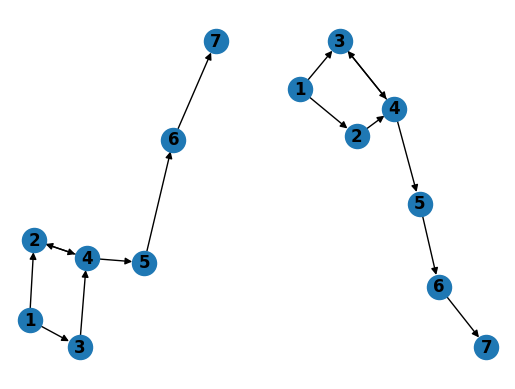

In [59]:
subax1 = plt.subplot(121)
nx.draw(ground_truth_graph.nx_graph, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw(generated_graph.nx_graph, with_labels=True, font_weight='bold')

In [227]:
do_mapping(ground_truth_graph.nx_graph, generated_graph.nx_graph)

Graphs are isomorphic and correct


{4: 4, 2: 3, 3: 2, 5: 5, 1: 1, 6: 6, 7: 7}

### Проверим на изоморфичность в случае, когда на ребрах несколько реплик, но графы одинаковы

In [228]:
with open('./identical_with_several_requests/ground_truth_graph.json', 'r') as f:
    ground_truth = json.load(f)

with open('./identical_with_several_requests/generated_graph.json', 'r') as g:
    generated = json.load(g)

In [229]:
ground_truth_graph = Graph(ground_truth, TYPES_OF_GRAPH.DI)
generated_graph = Graph(generated, TYPES_OF_GRAPH.DI)

In [232]:
from utils import do_mapping
do_mapping(ground_truth_graph.nx_graph, generated_graph.nx_graph)

Graphs are isomorphic and correct


{4: 4, 2: 3, 3: 2, 5: 5, 1: 1, 6: 6, 7: 7}

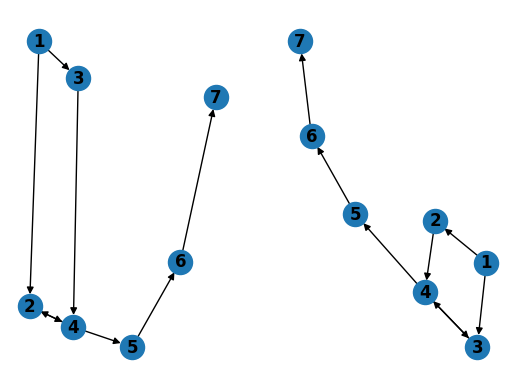

In [53]:

subax1 = plt.subplot(121)
nx.draw(ground_truth_graph.nx_graph, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw(generated_graph.nx_graph, with_labels=True, font_weight='bold')

### Проверка когда есть несоотвествие

In [11]:
with open('./nonidentical_graphs/ground_truth_graph.json', 'r') as f:
    ground_truth = json.load(f)

with open('./nonidentical_graphs/generated_graph.json', 'r') as g:
    generated = json.load(g)

In [15]:
ground_truth_graph = Graph(ground_truth, TYPES_OF_GRAPH.MULTI)
generated_graph = Graph(generated, TYPES_OF_GRAPH.MULTI)

G1 = ground_truth_graph.nx_graph
G2 = generated_graph.nx_graph

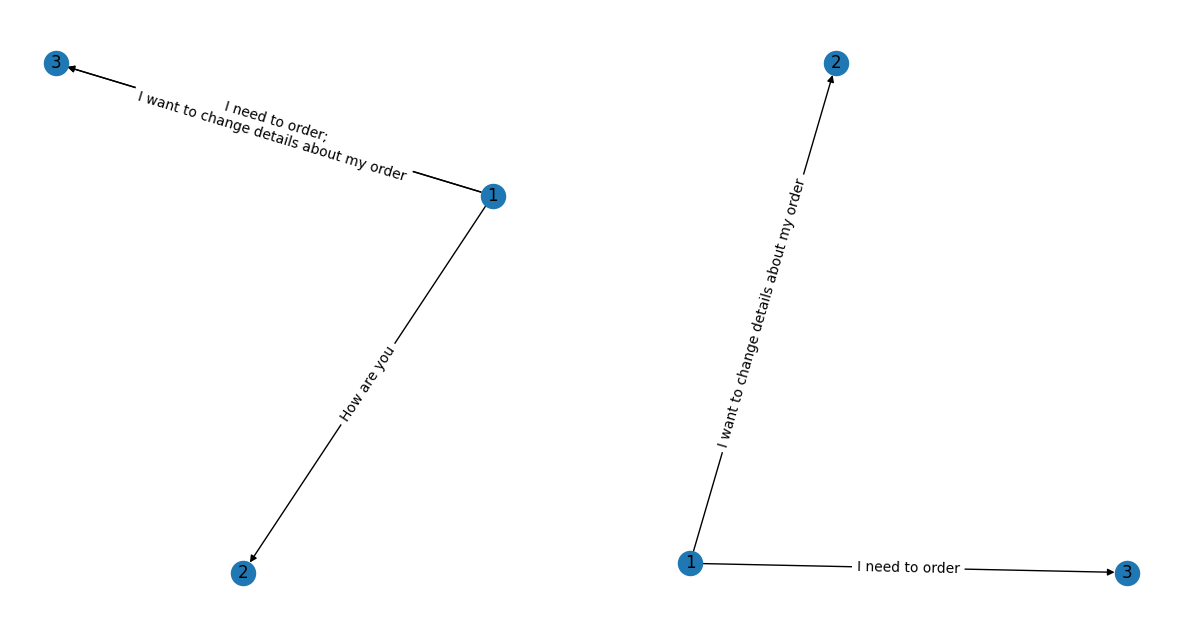

In [52]:
# pos = nx.spring_layout(G1)
plt.figure(figsize=(15,8))
subax1 = plt.subplot(121)
# nx.draw(G1, with_labels=True, font_weight='bold')
pos = nx.spring_layout(G1, k=5)
nx.draw(G1, pos, with_labels=True)
g1_edge_labels = get_edge_labels(G1)
nx.draw_networkx_edge_labels(G1, pos, edge_labels=g1_edge_labels, label_pos=0.5, font_size=10)

subax2 = plt.subplot(122)
pos2 = nx.spring_layout(G2, k=5)
nx.draw(G2, pos2, with_labels=True)
g2_edge_labels = get_edge_labels(G2)
nx.draw_networkx_edge_labels(G2, pos2, edge_labels=g2_edge_labels, label_pos=0.5, font_size=10)
plt.show()

In [243]:
do_mapping(G1, G2)

in g1 Node 3 is split into [3, 2] in g2
{3: [3, 2]}
{}
{1: 1, 2: None, 3: 3}


## Метрика

In [5]:
from metric.metric_calc import collapse_multiedges, jaccard_edges, jaccard_nodes

In [58]:
list(G1.edges(data=True))

[(1, 3, {'requests': 'I need to order'}),
 (1, 3, {'requests': 'I want to change details about my order'}),
 (1, 2, {'requests': 'How are you'})]

In [82]:
jaccard_edges(G1.edges(data=True), G2.edges(data=True))

1->3 ['I need to order', 'I want to change details about my order']
1->3 ['I need to order']
___
1->3 ['I need to order', 'I want to change details about my order']
1->2 ['I want to change details about my order']
___
1->2 ['How are you']
1->3 ['I need to order']
___
1->2 ['How are you']
1->2 ['I want to change details about my order']
___
[[0.5 0.5]
 [0.  0. ]]


(array([0.5, 0. ]), array([0, 0]))

In [52]:
jaccard_nodes(G1.nodes(data=True), G2.nodes(data=True))

(array([0., 1., 0., 0.]), array([0, 1, 0, 0]))